# 제목: chatfuel 을 이용한 문서 요약

- 추천 OS: ubuntu 14.04 이상
- python 3 이상

chatfuel 구성
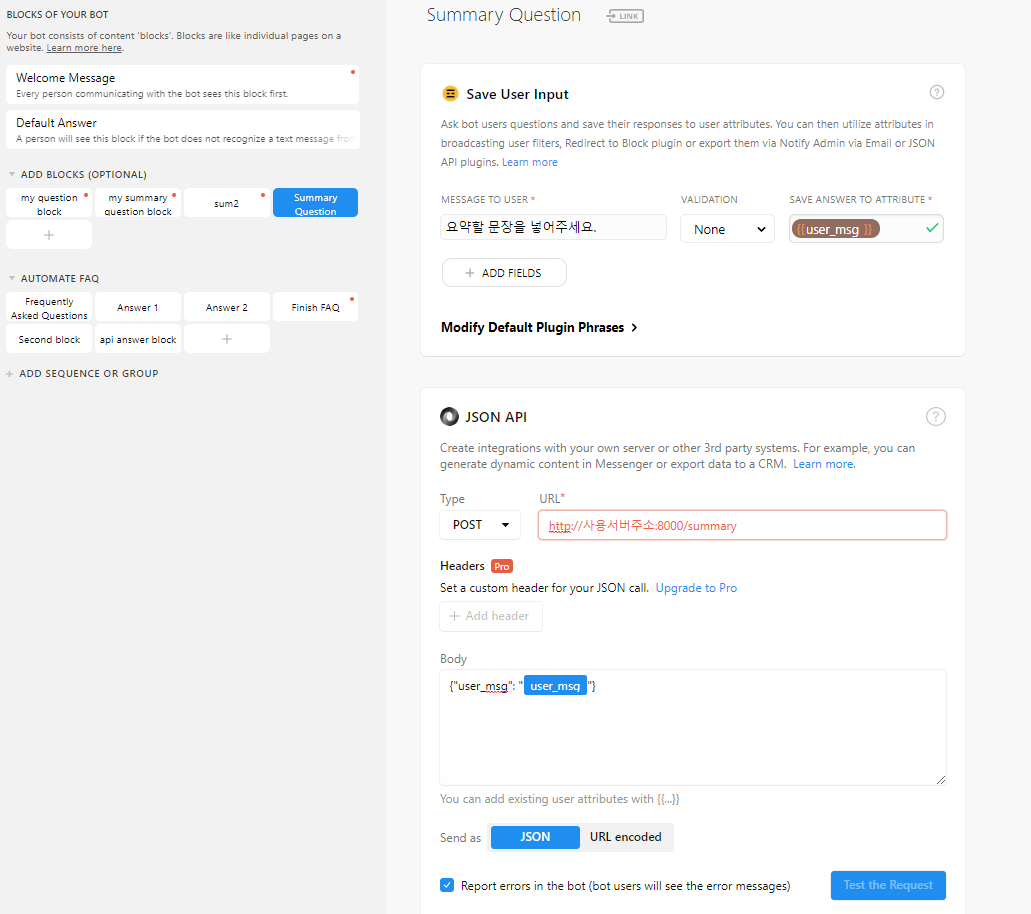


## 미리 설치 필요
- flask
- flask_restful
- lexrankr


## 요약 서버 코드

In [ ]:
from __future__ import print_function
from flask import Flask, request
from flask_restful import Resource, Api, reqparse, abort
from lexrankr import LexRank
'''
목적: 한국어 문장 요약
참조: LexRank for Korean / https://github.com/theeluwin/lexrankr
'''

app = Flask(__name__)
api = Api(app)

def on_json_loading_failed_return_dict(e):  
    return {} 

class Summary(Resource):
    def post(self):
        request.on_json_loading_failed = on_json_loading_failed_return_dict
        req_json = request.get_json()
        msg = req_json['user_msg']
        #print(msg)
        
        lexrank = LexRank()
        lexrank.summarize(msg)
        summaries = lexrank.probe()
        result = '/'.join(summaries)
        #print(result)
        # 아래 부분은 chatfuel의 문서를 참고하여 리턴형식에 맞추어줘야 함.
        # 아래와 같이 구성해야 채팅창에 요약한 응답이 감
        return {"messages":[{"text" : result}]}

    def get(self):
        return {'resut': 'ok'}

api.add_resource(Summary, '/summary')
 
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8000, debug=True)

